# Credit Risk Modeling - Data Exploration & Preprocessing

**Project:** Personal Loan Credit Risk Model  
**Dataset:** Lending Club Loan Data (2007-2018)  
**Objective:** Explore the dataset, understand its structure, and prepare it for modeling

---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

In [14]:
# Load dataset sample
df = pd.read_csv('../data/raw/accepted_2007_to_2018Q4.csv', nrows=100000)
df.shape

(100000, 151)

In [15]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.000,3600.000,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.910,0.000,Aug-2003,675.000,679.000,1.000,30.000,NaN,7.000,0.000,2765.000,29.700,13.000,w,0.000,0.000,4421.724,4421.720,3600.000,821.720,0.000,0.000,0.000,Jan-2019,122.670,NaN,Mar-2019,564.000,560.000,0.000,30.000,1.000,Individual,NaN,NaN,NaN,0.000,722.000,144904.000,2.000,2.000,0.000,1.000,21.000,4981.000,36.000,3.000,3.000,722.000,34.000,9300.000,3.000,1.000,4.000,4.000,20701.000,1506.000,37.200,0.000,0.000,148.000,128.000,3.000,3.000,1.000,4.000,69.000,4.000,69.000,2.000,2.000,4.000,2.000,5.000,3.000,4.000,9.000,4.000,7.000,0.000,0.000,0.000,3.000,76.900,0.000,0.000,0.000,178050.000,7746.000,2400.000,13734.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.000,24700.000,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.060,1.000,Dec-1999,715.000,719.000,4.000,6.000,NaN,22.000,0.000,21470.000,19.200,38.000,w,0.000,0.000,25679.660,25679.660,24700.000,979.660,0.000,0.000,0.000,Jun-2016,926.350,NaN,Mar-2019,699.000,695.000,0.000,NaN,1.000,Individual,NaN,NaN,NaN,0.000,0.000,204396.000,1.000,1.000,0.000,1.000,19.000,18005.000,73.000,2.000,3.000,6472.

In [16]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 115
Categorical columns: 36


In [17]:
# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Columns with missing values: {len(missing_df)}/{len(df.columns)}")
print(f"\nColumns with >50% missing: {len(missing_df[missing_df['Missing_Percentage'] > 50])}")
print(f"Columns with >80% missing: {len(missing_df[missing_df['Missing_Percentage'] > 80])}")

missing_df.head(20)

Columns with missing values: 73/151

Columns with >50% missing: 57
Columns with >80% missing: 41


,Column,Missing_Count,Missing_Percentage
1,member_id,100000,100.000
115,revol_bal_joint,100000,100.000
117,sec_app_fico_range_high,100000,100.000
118,sec_app_earliest_cr_line,100000,100.000
119,sec_app_inq_last_6mths,100000,100.000
120,sec_app_mort_acc,100000,100.000
121,sec_app_open_acc,100000,100.000
122,sec_app_revol_util,100000,100.000
123,sec_app_open_act_il,100000,100.000
124,sec_app_num_rev_accts,100000,100.000


In [18]:
print("Loan Status Distribution:\n")
print(df['loan_status'].value_counts())
print("\n" + "="*50 + "\n")
print("Percentage Distribution:\n")
print((df['loan_status'].value_counts(normalize=True) * 100).round(2))

Loan Status Distribution:

loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64


Percentage Distribution:

loan_status
Fully Paid           70.290
Charged Off          17.600
Current              11.400
Late (31-120 days)    0.440
In Grace Period       0.200
Late (16-30 days)     0.070
Default               0.000
Name: proportion, dtype: float64


In [19]:
# Keep only Fully Paid and Charged Off
df_filtered = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

# Create binary target
df_filtered['default'] = (df_filtered['loan_status'] == 'Charged Off').astype(int)

print(f"Original dataset: {len(df):,} rows")
print(f"Filtered dataset: {len(df_filtered):,} rows")
print(f"Rows removed: {len(df) - len(df_filtered):,} ({((len(df) - len(df_filtered)) / len(df) * 100):.2f}%)")
print(f"\nDefault rate: {df_filtered['default'].mean() * 100:.2f}%")
print(f"Non-default rate: {(1 - df_filtered['default'].mean()) * 100:.2f}%")

Original dataset: 100,000 rows
Filtered dataset: 87,891 rows
Rows removed: 12,109 (12.11%)

Default rate: 20.03%
Non-default rate: 79.97%


In [20]:
# Calculate missing values in filtered dataset
missing_filtered = df_filtered.isnull().sum()
missing_pct_filtered = (missing_filtered / len(df_filtered)) * 100

# Columns with >50% missing
cols_to_drop = missing_pct_filtered[missing_pct_filtered > 50].index.tolist()

print(f"Columns to drop (>50% missing): {len(cols_to_drop)}")

# Also drop redundant columns
cols_to_drop.extend(['loan_status', 'id', 'member_id', 'url', 'desc', 'title'])
cols_to_drop = [col for col in cols_to_drop if col in df_filtered.columns]

print(f"Total columns to drop: {len(cols_to_drop)}")
print(f"Columns remaining: {len(df_filtered.columns) - len(cols_to_drop)}")

Columns to drop (>50% missing): 57
Total columns to drop: 63
Columns remaining: 89


In [21]:
# Drop high missing and redundant columns
df_clean = df_filtered.drop(columns=cols_to_drop, errors='ignore')

print(f"Shape after dropping columns: {df_clean.shape}")
print(f"Columns: {df_clean.shape[1]}")
print(f"Rows: {df_clean.shape[0]:,}")

Shape after dropping columns: (87891, 91)
Columns: 91
Rows: 87,891


In [22]:
# Key features we need for modeling
key_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'initial_list_status', 'total_pymnt', 'total_rec_prncp', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt'
]

existing = [col for col in key_features if col in df_clean.columns]
missing = [col for col in key_features if col not in df_clean.columns]

print(f"Key features found: {len(existing)}/{len(key_features)}")
if missing:
    print(f"\nMissing features: {missing}")

Key features found: 26/26


In [23]:
# Check remaining missing values
missing_remaining = df_clean.isnull().sum()
missing_pct_remaining = (missing_remaining / len(df_clean)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_remaining.index,
    'Missing_Count': missing_remaining.values,
    'Missing_Percentage': missing_pct_remaining.values
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Columns with missing values: {len(missing_summary)}")
print("\nTop 15 columns with missing values:")
missing_summary.head(15)

Columns with missing values: 15

Top 15 columns with missing values:


,Column,Missing_Count,Missing_Percentage
24,mths_since_last_delinq,42232,48.050
64,mths_since_recent_inq,9268,10.545
8,emp_title,5650,6.428
9,emp_length,5629,6.405
75,num_tl_120dpd_2m,4590,5.222
58,mo_sin_old_il_acct,2560,2.913
80,percent_bc_gt_75,971,1.105
55,bc_util,944,1.074
54,bc_open_to_buy,896,1.019
63,mths_since_recent_bc,858,0.976


Loan Amount Statistics:
count   87891.000
mean    14376.091
std      8595.699
min      1000.000
25%      7900.000
50%     12000.000
75%     20000.000
max     35000.000
Name: loan_amnt, dtype: float64

Mean: $14,376.09
Median: $12,000.00


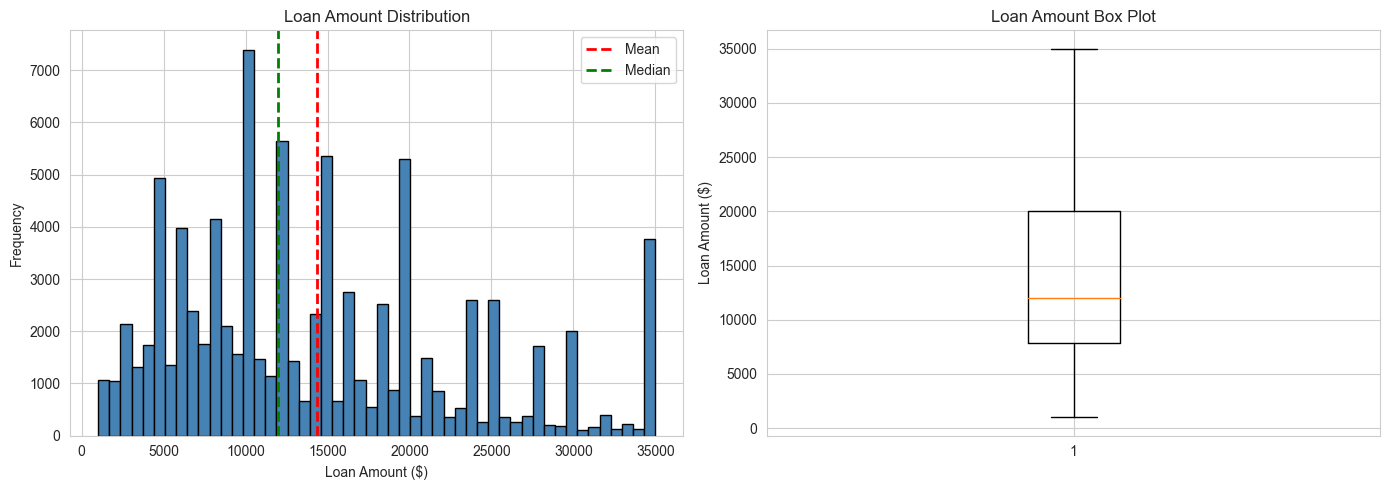

In [24]:
# Loan amount statistics
print("Loan Amount Statistics:")
print(df_clean['loan_amnt'].describe())
print(f"\nMean: ${df_clean['loan_amnt'].mean():,.2f}")
print(f"Median: ${df_clean['loan_amnt'].median():,.2f}")

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['loan_amnt'], bins=50, color='steelblue', edgecolor='black')
plt.axvline(df_clean['loan_amnt'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(df_clean['loan_amnt'].median(), color='green', linestyle='--', linewidth=2, label='Median')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['loan_amnt'])
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount Box Plot')

plt.tight_layout()
plt.show()

Interest Rate Statistics:
count   87891.000
mean       11.946
std         4.127
min         5.320
25%         8.490
50%        11.530
75%        14.330
max        28.990
Name: int_rate, dtype: float64


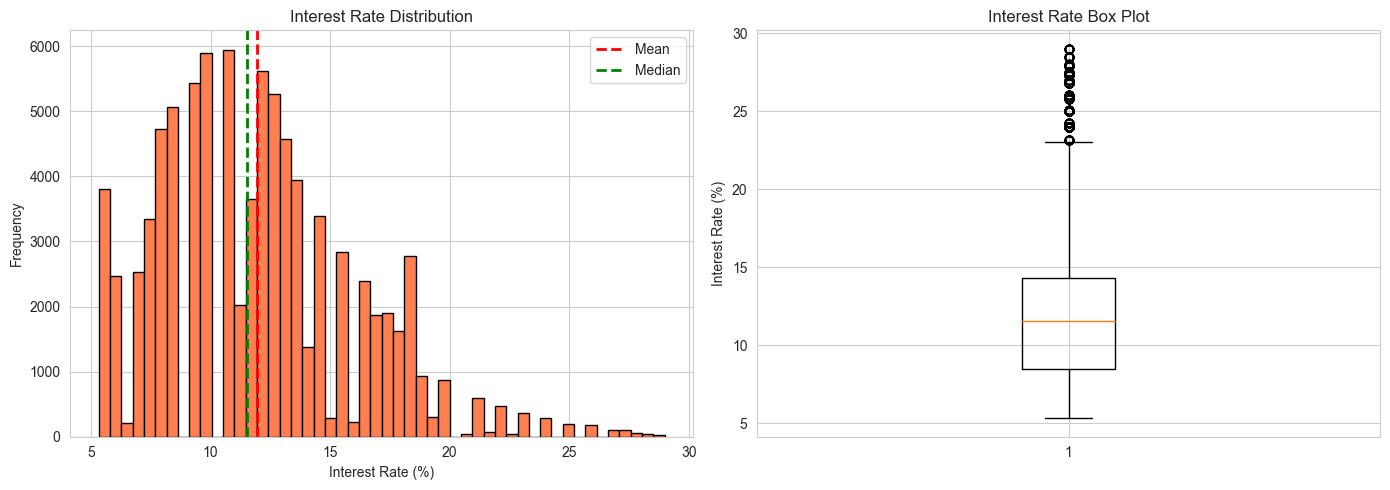

In [25]:
# Interest rate statistics
print("Interest Rate Statistics:")
print(df_clean['int_rate'].describe())

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['int_rate'], bins=50, color='coral', edgecolor='black')
plt.axvline(df_clean['int_rate'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(df_clean['int_rate'].median(), color='green', linestyle='--', linewidth=2, label='Median')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['int_rate'])
plt.ylabel('Interest Rate (%)')
plt.title('Interest Rate Box Plot')

plt.tight_layout()
plt.show()

Grade Distribution:
grade
A    17059
B    28027
C    24487
D    10951
E     5498
F     1532
G      337
Name: count, dtype: int64


Default Rate by Grade:
       Defaults  Total_Loans  Default_Rate
grade                                     
A           907        17059         5.320
B          3699        28027        13.200
C          5803        24487        23.700
D          3776        10951        34.480
E          2410         5498        43.830
F           809         1532        52.810
G           199          337        59.050


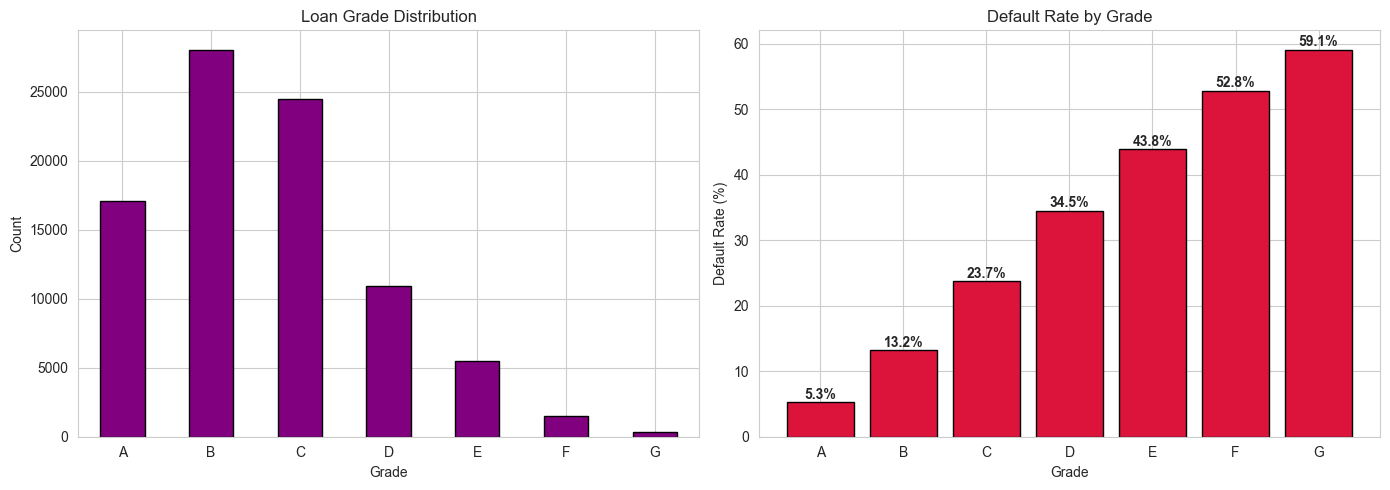

In [26]:
# Grade distribution
print("Grade Distribution:")
print(df_clean['grade'].value_counts().sort_index())
print("\n" + "="*50 + "\n")

# Default rate by grade
default_by_grade = df_clean.groupby('grade')['default'].agg(['sum', 'count', 'mean']).round(4)
default_by_grade.columns = ['Defaults', 'Total_Loans', 'Default_Rate']
default_by_grade['Default_Rate'] = default_by_grade['Default_Rate'] * 100

print("Default Rate by Grade:")
print(default_by_grade)

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df_clean['grade'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Grade Distribution')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.bar(default_by_grade.index, default_by_grade['Default_Rate'], color='crimson', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Grade')
plt.xticks(rotation=0)

for i, (idx, row) in enumerate(default_by_grade.iterrows()):
    plt.text(i, row['Default_Rate'] + 0.5, f"{row['Default_Rate']:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Annual Income Statistics:
count     87891.000
mean      77685.198
std       89676.548
min           0.000
25%       46000.000
50%       65000.000
75%       92624.000
max     9000000.000
Name: annual_inc, dtype: float64

99th percentile: $264,000.00


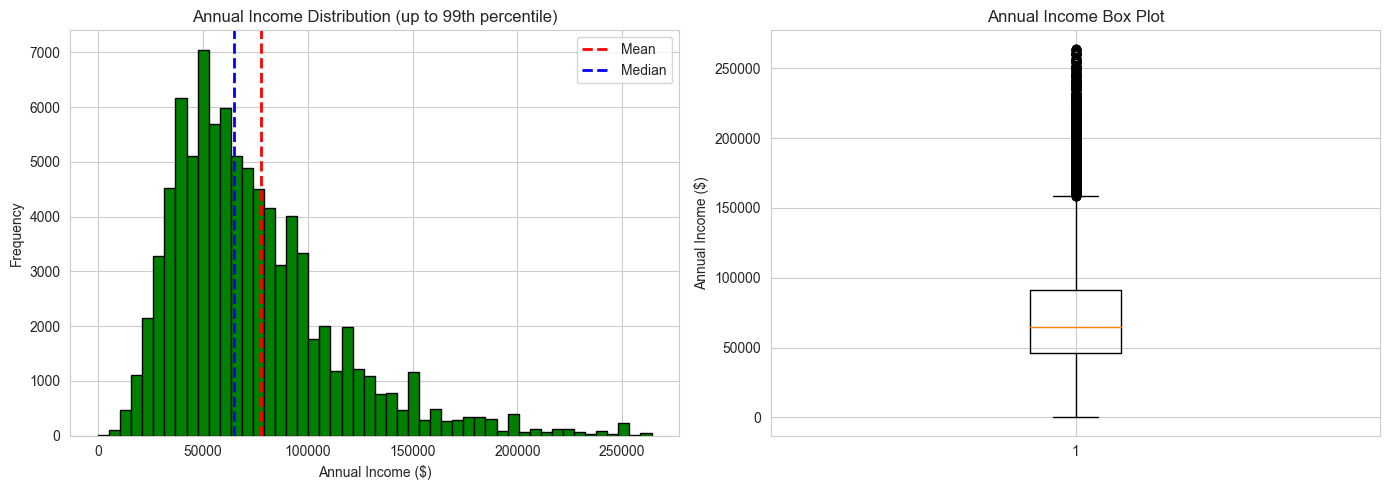

In [27]:
# Remove extreme outliers for visualization (keep data intact)
q99 = df_clean['annual_inc'].quantile(0.99)

print("Annual Income Statistics:")
print(df_clean['annual_inc'].describe())
print(f"\n99th percentile: ${q99:,.2f}")

# Visualize (up to 99th percentile for better view)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean['annual_inc'] <= q99]['annual_inc'], bins=50, color='green', edgecolor='black')
plt.axvline(df_clean['annual_inc'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(df_clean['annual_inc'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution (up to 99th percentile)')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_clean[df_clean['annual_inc'] <= q99]['annual_inc'])
plt.ylabel('Annual Income ($)')
plt.title('Annual Income Box Plot')

plt.tight_layout()
plt.show()

DTI Statistics:
count   87889.000
mean       18.988
std         9.702
min         0.000
25%        12.320
50%        18.410
75%        25.210
max       999.000
Name: dti, dtype: float64


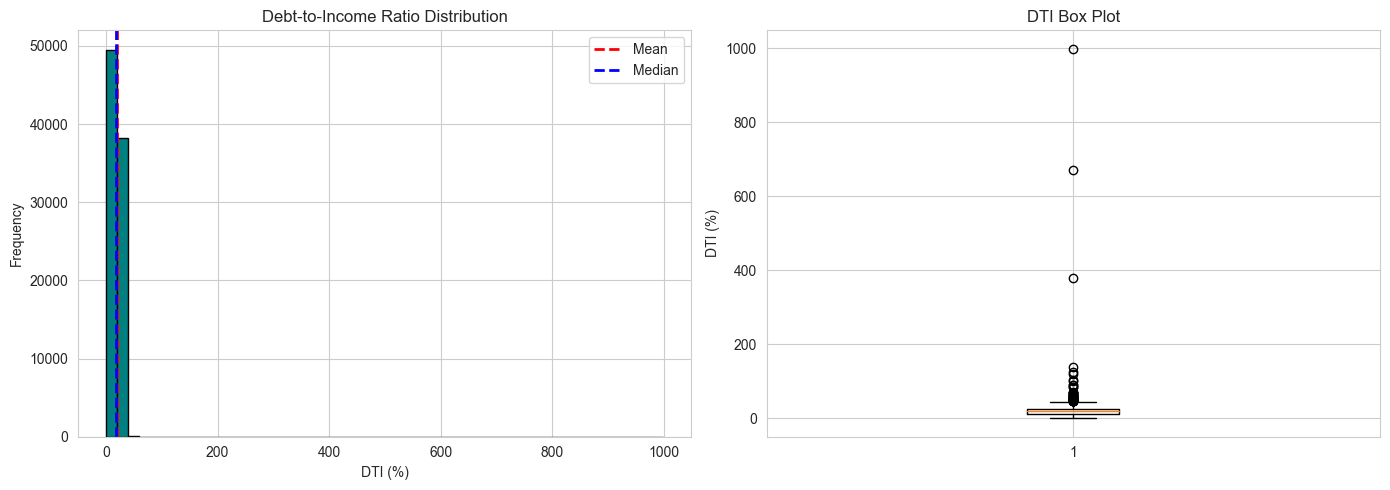

In [28]:
# DTI statistics
print("DTI Statistics:")
print(df_clean['dti'].describe())

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['dti'].dropna(), bins=50, color='teal', edgecolor='black')
plt.axvline(df_clean['dti'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(df_clean['dti'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.title('Debt-to-Income Ratio Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['dti'].dropna())
plt.ylabel('DTI (%)')
plt.title('DTI Box Plot')

plt.tight_layout()
plt.show()

Correlation with Default (Top features):
default           1.000
int_rate          0.308
dti               0.106
inq_last_6mths    0.095
loan_amnt         0.072
revol_util        0.050
open_acc          0.044
installment       0.040
pub_rec           0.026
delinq_2yrs       0.018
total_acc         0.015
revol_bal        -0.027
annual_inc       -0.038
Name: default, dtype: float64


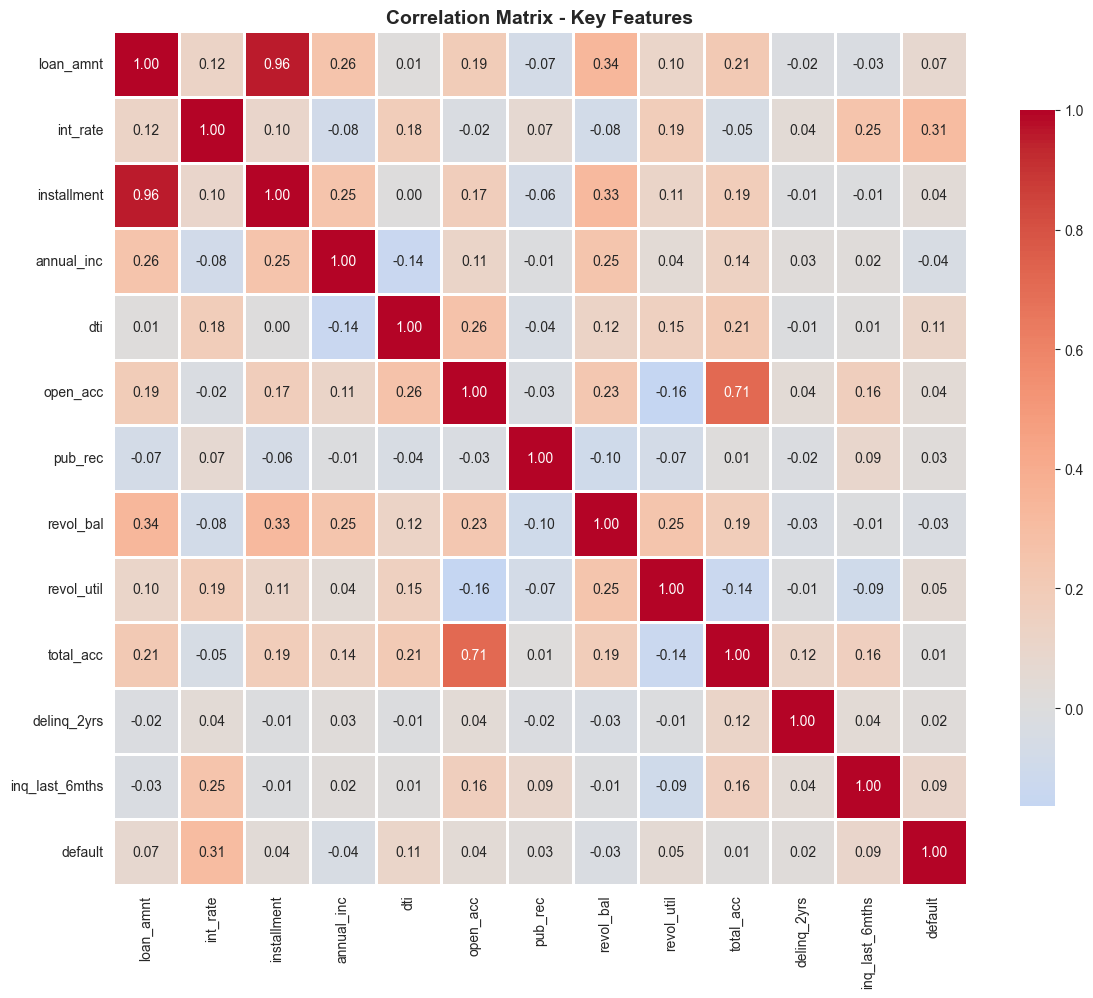

In [29]:
# Select key numerical features for correlation
corr_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                 'delinq_2yrs', 'inq_last_6mths', 'default']

# Filter to existing columns
corr_features = [col for col in corr_features if col in df_clean.columns]

# Calculate correlation with default
corr_with_default = df_clean[corr_features].corr()['default'].sort_values(ascending=False)

print("Correlation with Default (Top features):")
print(corr_with_default)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[corr_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
import os

# Create processed folder if doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save cleaned dataset
df_clean.to_csv('../data/processed/loans_cleaned.csv', index=False)

print(f"Cleaned dataset saved")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.shape[1]}")
print(f"Rows: {df_clean.shape[0]:,}")
print(f"Default rate: {df_clean['default'].mean() * 100:.2f}%")

Cleaned dataset saved
Shape: (87891, 91)
Columns: 91
Rows: 87,891
Default rate: 20.03%


In [31]:
# Check for problematic values
print("DATA QUALITY ISSUES:")
print("="*60)

# Annual income issues
print(f"\nAnnual Income = $0: {(df_clean['annual_inc'] == 0).sum()} rows")
print(f"Annual Income > $500k: {(df_clean['annual_inc'] > 500000).sum()} rows")
print(f"Annual Income > $1M: {(df_clean['annual_inc'] > 1000000).sum()} rows")

# DTI issues
print(f"\nDTI > 100%: {(df_clean['dti'] > 100).sum()} rows")
print(f"DTI > 50%: {(df_clean['dti'] > 50).sum()} rows")

# Show extreme examples
print("\nExtreme Annual Income Examples:")
print(df_clean.nlargest(5, 'annual_inc')[['annual_inc', 'loan_amnt', 'grade', 'default']])

print("\nExtreme DTI Examples:")
print(df_clean.nlargest(5, 'dti')[['dti', 'annual_inc', 'loan_amnt', 'grade', 'default']])

DATA QUALITY ISSUES:

Annual Income = $0: 2 rows
Annual Income > $500k: 142 rows
Annual Income > $1M: 29 rows

DTI > 100%: 8 rows
DTI > 50%: 32 rows

Extreme Annual Income Examples:
       annual_inc  loan_amnt grade  default
40533 9000000.000  11000.000     A        0
24659 8700000.000  14000.000     B        0
48075 8500021.000  12000.000     B        0
85757 8253000.000  30000.000     C        0
38473 7000000.000  25000.000     A        0

Extreme DTI Examples:
          dti  annual_inc  loan_amnt grade  default
8721  999.000    1770.000   6550.000     D        0
73833 672.520    1200.000  12000.000     E        0
66461 380.530    5000.000  19000.000     D        0
10548 137.400   20000.000  15000.000     D        0
77957 125.250    9745.000  12000.000     D        0


In [32]:
# Strategy:
# 1. Remove income = 0 (only 2 rows)
# 2. Cap income at 99th percentile ($264k)
# 3. Cap DTI at 50% (industry standard max)

print("BEFORE CLEANING:")
print(f"Rows: {len(df_clean):,}")
print(f"Income range: ${df_clean['annual_inc'].min():,.0f} - ${df_clean['annual_inc'].max():,.0f}")
print(f"DTI range: {df_clean['dti'].min():.2f}% - {df_clean['dti'].max():.2f}%")

# Remove rows with income = 0
df_clean = df_clean[df_clean['annual_inc'] > 0].copy()

# Cap annual income at 99th percentile
income_cap = df_clean['annual_inc'].quantile(0.99)
df_clean['annual_inc'] = df_clean['annual_inc'].clip(upper=income_cap)

# Cap DTI at 50%
df_clean['dti'] = df_clean['dti'].clip(upper=50)

print("\n" + "="*60)
print("AFTER CLEANING:")
print(f"Rows: {len(df_clean):,}")
print(f"Income range: ${df_clean['annual_inc'].min():,.0f} - ${df_clean['annual_inc'].max():,.0f}")
print(f"DTI range: {df_clean['dti'].min():.2f}% - {df_clean['dti'].max():.2f}%")
print(f"\nRows removed: {87891 - len(df_clean)}")

BEFORE CLEANING:
Rows: 87,891
Income range: $0 - $9,000,000
DTI range: 0.00% - 999.00%

AFTER CLEANING:
Rows: 87,889
Income range: $1,200 - $264,000
DTI range: 0.00% - 50.00%

Rows removed: 2


In [33]:
# Re-check statistics after cleaning
print("CLEANED DATA STATISTICS:\n")

print("Annual Income:")
print(df_clean['annual_inc'].describe())

print("\n" + "="*60)
print("\nDebt-to-Income Ratio:")
print(df_clean['dti'].describe())

print("\n" + "="*60)
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Default rate: {df_clean['default'].mean() * 100:.2f}%")

CLEANED DATA STATISTICS:

Annual Income:
count    87889.000
mean     75570.370
std      43386.571
min       1200.000
25%      46000.000
50%      65000.000
75%      92640.000
max     264000.000
Name: annual_inc, dtype: float64


Debt-to-Income Ratio:
count   87889.000
mean       18.958
std         8.720
min         0.000
25%        12.320
50%        18.410
75%        25.210
max        50.000
Name: dti, dtype: float64


Final dataset shape: (87889, 91)
Default rate: 20.03%


In [35]:
# Save the fully cleaned dataset
df_clean.to_csv('../data/processed/loans_cleaned_final.csv', index=False)

print("Final cleaned dataset saved")
print(f"  Location: data/processed/loans_cleaned_final.csv")
print(f"  Shape: {df_clean.shape}")
print(f"  Rows: {df_clean.shape[0]:,}")
print(f"  Columns: {df_clean.shape[1]}")

Final cleaned dataset saved
  Location: data/processed/loans_cleaned_final.csv
  Shape: (87889, 91)
  Rows: 87,889
  Columns: 91


---
## Exploration Complete - Key Findings

### Dataset Summary:
- **Final rows:** 87,889 loans
- **Features:** 91 columns
- **Target variable:** 20.03% default rate
- **Time period:** 2007-2018

### Key Predictors Identified:
1. **Interest Rate (0.31 correlation)** - Strongest predictor
2. **Grade (A→G)** - Clear risk gradient (5% → 59% default)
3. **DTI** - Higher debt = higher default
4. **Recent Credit Inquiries** - Sign of financial stress
5. **Loan Amount, Income** - Weaker but relevant

### Data Quality Actions:
- Dropped 57 columns (>50% missing)
- Removed 12,109 rows (Current/Late status)
- Fixed 2 rows with $0 income
- Capped income at $264k (99th percentile)
- Capped DTI at 50%

---